# Fall 2021 Data Science Intern Challenge: Miao Xi

<ins>**This document contains answers to both challenge questions.**</ins>

## **Question 1**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

## **Question 1 Answers**
1. **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. **

 There exist several outliers within the order dataset which significantly skewed the average order value. There are 2 types of outliers:
 * Extremely large number of items within one order
 * Extremely high unit price per item

 To better evaluate this data, these outliers should be first identified, second evaluated by the percentage of outliers within this dataset and then removed from the dataset if necessary.

 In the below script, K-means clustering technique is used to identify outliers within the dataset. There are total 67 outliers out of total 5000 orders. The percentage of outliers is 1.34%. it is deemed suitable to remove the outliers and re-calculate the average order value (AOV).
 
2. **What metric would you report for this dataset?**

 AOV excluding the 67 outliers would be a good metrics to report for this dataset.
 
3. **What is its value?**

 The AOV is 302.58 currency unit.

### Detailed Solution

* **Import packages and load data**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [26]:
df_original = pd.read_csv('Shopify_Intern_Challenge_Data_Set.csv', header = 0, engine = 'c')
df_original.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [27]:
df_study = df_original.copy()
df_study['unit_price'] = df_study['order_amount']/df_study['total_items']
df_study.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


* **Examine original dataset**

 The order_amount, total_items and unit_price columns all have large standard deviations and skewed distributions. Indicating the existence of outliers.

In [28]:
df_study.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


* **Using the Elbow method to identify the optimal K for K-Means**
 
 The number of K indicates how many clusters exists in the original dataset. Some of these clusters could be the outlliers. From the graph below we could observe that 3 would be the optimal K meaning there are 3 clusters of order based on the 3 columns: order_amount, total_items and unit_price. Becuase their numeric nature.

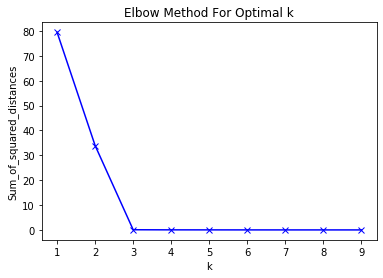

In [29]:
df_study_clus = df_study[['order_amount','total_items','unit_price']]
scaler = MinMaxScaler()
df_study_t = scaler.fit_transform(df_study_clus)
df_study_t = pd.DataFrame({'order_amount':df_study_t [:, 0], 'total_items':df_study_t[:, 1], 'unit_price': df_study_t[:, 2]})
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_study_t)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
km = KMeans(n_clusters=3)
km = km.fit(df_study_t)
df_study_t['Label'] = km.labels_
df_study_t.head()

,order_amount,total_items,unit_price,Label
0,0.000190,0.0005,0.000858,0
1,0.000000,0.0000,0.000000,0
2,0.000077,0.0000,0.002106,0
3,0.000094,0.0000,0.002575,0
4,0.000094,0.0000,0.002575,0


* **Visualize the clusters of order**

 Each cluster of orders is assigned with a integer label and a color code. The red (label 1) and blue (label 2) clusters represent outliers in the order data. In the blue cluster are those orders with extreamly large number of items. In the red cluster are those orders with extreamly high unit price.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


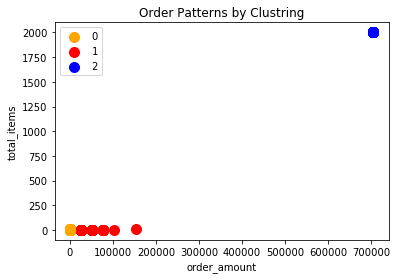

In [37]:
cdict = {0:'orange' ,1: 'red', 2: 'blue'}
df_study_clus['Label'] = df_study_t['Label']
df_study['Label'] = df_study_t['Label']
df_study_clus['created_at'] = df_study['created_at']
group = np.array(df_study_clus['Label'])
scatter_x = np.array(df_study_clus['order_amount'])
scatter_y = np.array(df_study_clus['total_items'])
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.title('Order Patterns by Clustring')
plt.xlabel('order_amount')
plt.ylabel('total_items')
plt.show()

* **The orders with extreamly large number of items**

In [38]:
df_study.loc[df_study_clus['Label']==2,:]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price,Label
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,2
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0,2
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0,2
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0,2
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0,2
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0,2
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0,2
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0,2
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0,2
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,2


* **The orders with extreamly high unit price**

In [39]:
df_study.loc[df_study_clus['Label']==1,:]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price,Label
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0,1
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0,1
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0,1
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0,1
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0,1
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0,1
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0,1
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0,1
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0,1
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0,1


* **The orders excluding all outliers**

In [40]:
df_remove_error = df_study.loc[df_study_clus['Label']==0,:]
df_remove_error.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price,Label
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.0
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536,0.0
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215,0.0
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000,0.0
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000,0.0
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000,0.0
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000,0.0
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000,0.0


## **Question 2**

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?

## **Question 2 Answers**

1. **How many orders were shipped by Speedy Express in total?**  
 
 **54** orders were shipped by Speedy Express in total.
 
    SELECT S.ShipperName, COUNT(O.OrderID) AS Number_of_Order  
    FROM Orders O, Shippers S  
    WHERE O.ShipperID = S.ShipperID AND S.ShipperName = 'Speedy Express'  
    GROUP BY S.ShipperName  
      
2. **What is the last name of the employee with the most orders?**

 **Peacock** was the last name of the employee with the most orders.
 
    SELECT E.LastName  
    FROM Employees E  
    WHERE E.EmployeeID =   
    (SELECT EmployeeID  
    FROM   
    (SELECT E.EmployeeID, COUNT(O.OrderID) AS Number_of_Order  
    FROM Orders O, Employees E  
    WHERE O.EmployeeID = E.EmployeeID   
    GROUP BY E.EmployeeID  
    ORDER BY COUNT(O.OrderID) DESC LIMIT 1)   
    )  

3. **What product was ordered the most by customers in Germany?**

 **Boston Crab Meat** was the most ordered product for customers in Germany.
 
    SELECT C.Country, P.ProductName, SUM(OD.Quantity) AS Quantity  
    FROM OrderDetails OD, Products P, Orders O, Customers C  
    WHERE OD.ProductID = P.ProductID AND OD.OrderID = O.OrderID AND O.CustomerID = C.CustomerID AND C.Country = 'Germany'  
    Group BY P.ProductName  
    ORDER BY SUM(OD.Quantity) DESC LIMIT 1  
 
 
